In [1]:
print("Hello world!")

Hello world!


In [6]:
import deepface
1

1

In [12]:
import os
import pandas as pd

In [26]:
from deepface import DeepFace


24-07-29 19:34:30 - Directory C:\Users\Hi/.deepface created
24-07-29 19:34:30 - Directory C:\Users\Hi/.deepface/weights created


In [18]:
import matplotlib.pyplot as plt
from PIL import Image

In [20]:
from tqdm import tqdm  # Import tqdm for the progress bar

In [73]:
"Single directory COMAPRISION WITHOUT PERCENTAGE"

'Single directory COMAPRISION WITHOUT PERCENTAGE'

Comparing Images: 100%|████████████████████████████████████████████████████████████████| 31/31 [00:19<00:00,  1.62it/s]


Comparison Results:
         Image  Distance
0      pb3.jpg  0.153141
1     ntr3.jpg  0.177822
2     ein2.jpg  0.189920
3    elon1.jpg  0.207266
4     ntr4.jpg  0.219564
5      mb4.jpg  0.258197
6       kk.jpg  0.264207
7      pb1.jpg  0.272444
8      pb6.jpg  0.279268
9      mb1.jpg  0.283418
10   elon3.jpg  0.291715
11     mb3.jpg  0.330094
12    ein4.jpg  0.334531
13   allu4.jpg  0.340403
14  images.jpg  0.347975
15    ntr1.jpg  0.359524
16   allu3.jpg  0.380674
17   allu1.jpg  0.381181
18   elon2.jpg  0.411674
19   elon4.jpg  0.419319
20     pb4.jpg  0.426933
21    ein1.jpg  0.458991
22     srk.jpg  0.477452
23    srk3.jpg  0.495192
24   allu2.jpg  0.519197
25     mb2.jpg  0.564671
26     EIN.jpg  0.581990
27     pb2.jpg  0.655003
28    ntr2.jpg  0.783596
29     pb5.jpg  0.830452
30    srk2.jpg  0.940468
Most similar image: pb3.jpg


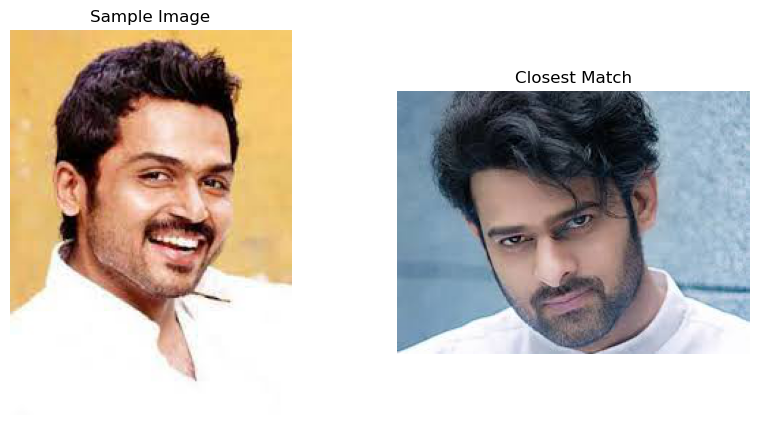

In [65]:





def compare_images(sample_image_path, images_folder_path):
    # Load the sample image
    sample_image = Image.open(sample_image_path)

    # Create a DataFrame to store results
    results = []

    # List all images in the folder
    image_files = [f for f in os.listdir(images_folder_path) if os.path.isfile(os.path.join(images_folder_path, f))]

    # Initialize tqdm for the progress bar
    for image_name in tqdm(image_files, desc="Comparing Images"):
        image_path = os.path.join(images_folder_path, image_name)
        try:
            # Compare the sample image with the current image
            result = DeepFace.represent(img_path=image_path, model_name='OpenFace', enforce_detection=False)
            distance = DeepFace.verify(img1_path=sample_image_path, img2_path=image_path, model_name='OpenFace', enforce_detection=False)['distance']

            # Append results to the DataFrame
            results.append({'Image': image_name, 'Distance': distance})

        except Exception as e:
            print(f"Error processing image {image_name}: {e}")

    # Create a DataFrame from the results
    df = pd.DataFrame(results)

    # Sort DataFrame by distance
    df_sorted = df.sort_values(by='Distance').reset_index(drop=True)

    # Display the results
    print("Comparison Results:")
    print(df_sorted)

    # Display the most similar image
    if not df_sorted.empty:
        closest_image = df_sorted.iloc[0]['Image']
        closest_image_path = os.path.join(images_folder_path, closest_image)
        print(f"Most similar image: {closest_image}")

        # Display the input and closest images
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.title("Sample Image")
        plt.imshow(sample_image)
        plt.axis('off')

        closest_image = Image.open(closest_image_path)
        plt.subplot(1, 2, 2)
        plt.title("Closest Match")
        plt.imshow(closest_image)
        plt.axis('off')

        plt.show()

# Example usage
sample_image_path = 'C:/Users/Hi\Desktop/vnvr/PROJECTS/dfc/kk1.jpg'
images_folder_path ='C:/Users/Hi\Desktop/vnvr/PROJECTS/dfc/train'

compare_images(sample_image_path, images_folder_path)


In [75]:
" Single directory COMAPRISION WITH PERCENTAGE %"

' Single directory COMAPRISION WITH PERCENTAGE %'

Comparing Images: 100%|████████████████████████████████████████████████████████████████| 32/32 [00:10<00:00,  3.06it/s]


Comparison Results:
         Image  Distance  Match Percentage
0      mb1.jpg  0.664778         33.522188
1    allu4.jpg  0.694193         30.580657
2    allu1.jpg  0.735560         26.443981
3       kk.jpg  0.741245         25.875523
4      pb7.PNG  0.744166         25.583390
5      pb3.jpg  0.747584         25.241586
6      mb2.jpg  0.751646         24.835358
7      srk.jpg  0.768374         23.162603
8      pb6.jpg  0.774294         22.570571
9     ntr3.jpg  0.776240         22.375980
10   allu3.jpg  0.778781         22.121878
11     pb1.jpg  0.780843         21.915675
12    srk2.jpg  0.782598         21.740156
13    ein4.jpg  0.801832         19.816801
14    ein2.jpg  0.806491         19.350873
15     pb4.jpg  0.810878         18.912218
16     mb4.jpg  0.811555         18.844537
17     pb2.jpg  0.829754         17.024584
18   elon2.jpg  0.854385         14.561526
19     mb3.jpg  0.858132         14.186783
20   allu2.jpg  0.865543         13.445711
21     pb5.jpg  0.876538         1

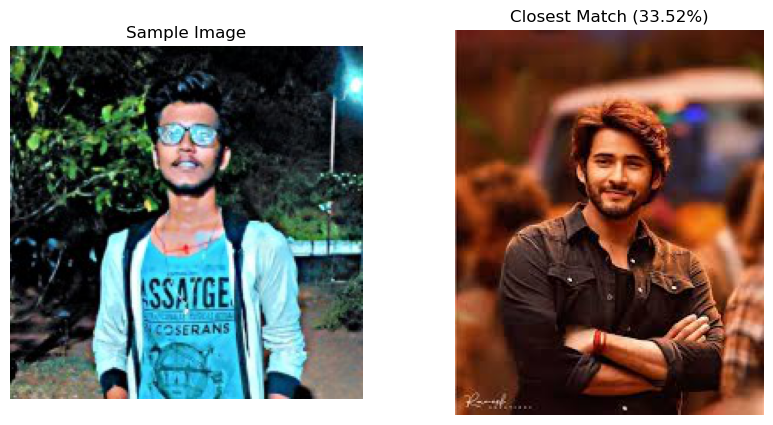

In [67]:
import os
import pandas as pd
from tqdm import tqdm
from deepface import DeepFace
from PIL import Image
import matplotlib.pyplot as plt

def compare_images(sample_image_path, images_folder_path):
    # Load the sample image
    sample_image = Image.open(sample_image_path)

    # Create a DataFrame to store results
    results = []

    # List all images in the folder
    image_files = [f for f in os.listdir(images_folder_path) if os.path.isfile(os.path.join(images_folder_path, f))]

    # Initialize tqdm for the progress bar
    for image_name in tqdm(image_files, desc="Comparing Images"):
        image_path = os.path.join(images_folder_path, image_name)
        try:
            # Compare the sample image with the current image
            result = DeepFace.represent(img_path=image_path, model_name='SFace', enforce_detection=False)
            verify_result = DeepFace.verify(img1_path=sample_image_path, img2_path=image_path, model_name='SFace', enforce_detection=False)
            distance = verify_result['distance']
            
            # Calculate percentage match (example calculation)
            percentage_match = (1 - distance) * 100  # Assuming distance range [0, 1] for similarity

            # Append results to the DataFrame
            results.append({'Image': image_name, 'Distance': distance, 'Match Percentage': percentage_match})

        except Exception as e:
            print(f"Error processing image {image_name}: {e}")

    # Create a DataFrame from the results
    df = pd.DataFrame(results)

    # Sort DataFrame by distance
    df_sorted = df.sort_values(by='Distance').reset_index(drop=True)

    # Display the results
    print("Comparison Results:")
    print(df_sorted)

    # Display the most similar image
    if not df_sorted.empty:
        closest_image = df_sorted.iloc[0]['Image']
        closest_image_path = os.path.join(images_folder_path, closest_image)
        closest_percentage = df_sorted.iloc[0]['Match Percentage']
        print(f"Most similar image: {closest_image}")
        print(f"Match Percentage: {closest_percentage:.2f}%")

        # Display the input and closest images
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.title("Sample Image")
        plt.imshow(sample_image)
        plt.axis('off')

        closest_image = Image.open(closest_image_path)
        plt.subplot(1, 2, 2)
        plt.title(f"Closest Match ({closest_percentage:.2f}%)")
        plt.imshow(closest_image)
        plt.axis('off')

        plt.show()

# Example usage
sample_image_path = 'C:/Users/Hi/Desktop/vnvr/PROJECTS/dfc/vnvr.jpg'
images_folder_path = 'C:/Users/Hi/Desktop/vnvr/PROJECTS/dfc/train'

compare_images(sample_image_path, images_folder_path)


In [ ]:
"Multiple directories"

Comparing Images in ronit roy: 100%|█████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.11s/it]


Comparison Results:
                                                 Image  Distance  \
0                                 kapil_sharma (9).jpg  0.622911   
1                             alok_nath_1546870621.jpg  0.661505   
2                                       chunky (1).JPG  0.691522   
3    MV5BODUxYTE2Y2EtZWI3Ni00YjlmLThiZDQtY2Y4YzAzZT...  0.698809   
4                                diljit_dosanj (3).jpg  0.715574   
..                                                 ...       ...   
636             220px_Kay_Kay_Menon_at_libas_store.jpg  1.154813   
637                              raju_behalnetwork.jpg  1.156494   
638                         johny_lever_1502876769.jpg  1.163579   
639                                 Manoj_Bajpai_1.jpg  1.166947   
640  220px_Himesh_Reshammiya_with_team_of__Humshaka...  1.181300   

     Match Percentage          Directory  
0           37.708881       kapil sharma  
1           33.849453          alok nath  
2           30.847774      chunky 

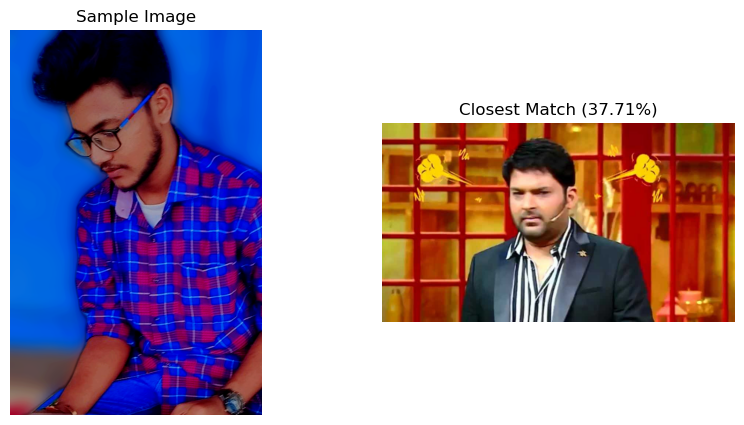

In [71]:
import os
import pandas as pd
from tqdm import tqdm
from deepface import DeepFace
from PIL import Image
import matplotlib.pyplot as plt

def compare_images(sample_image_path, base_folder_path):
    # Load the sample image
    sample_image = Image.open(sample_image_path)

    # Create a DataFrame to store results
    results = []

    # List all subdirectories in the base folder
    subdirectories = [d for d in os.listdir(base_folder_path) if os.path.isdir(os.path.join(base_folder_path, d))]

    # Iterate through each subdirectory
    for subdirectory in subdirectories:
        subdir_path = os.path.join(base_folder_path, subdirectory)

        # List all images in the subdirectory
        image_files = [f for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f))]

        # Initialize tqdm for the progress bar
        for image_name in tqdm(image_files, desc=f"Comparing Images in {subdirectory}"):
            image_path = os.path.join(subdir_path, image_name)
            try:
                # Compare the sample image with the current image
                result = DeepFace.represent(img_path=image_path, model_name='SFace', enforce_detection=False)
                verify_result = DeepFace.verify(img1_path=sample_image_path, img2_path=image_path, model_name='SFace', enforce_detection=False)
                distance = verify_result['distance']
                
                # Calculate percentage match (example calculation)
                percentage_match = (1 - distance) * 100  # Assuming distance range [0, 1] for similarity

                # Append results to the DataFrame
                results.append({'Image': image_name, 'Distance': distance, 'Match Percentage': percentage_match, 'Directory': subdirectory})

            except Exception as e:
                print(f"Error processing image {image_name} in {subdirectory}: {e}")

    # Create a DataFrame from the results
    df = pd.DataFrame(results)

    # Sort DataFrame by distance
    df_sorted = df.sort_values(by='Distance').reset_index(drop=True)

    # Display the results
    print("Comparison Results:")
    print(df_sorted)

    # Display the most similar image
    if not df_sorted.empty:
        closest_image = df_sorted.iloc[0]['Image']
        closest_image_directory = df_sorted.iloc[0]['Directory']
        closest_image_path = os.path.join(base_folder_path, closest_image_directory, closest_image)
        closest_percentage = df_sorted.iloc[0]['Match Percentage']
        print(f"Most similar image: {closest_image} in {closest_image_directory}")
        print(f"Match Percentage: {closest_percentage:.2f}%")

        # Display the input and closest images
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.title("Sample Image")
        plt.imshow(sample_image)
        plt.axis('off')

        closest_image = Image.open(closest_image_path)
        plt.subplot(1, 2, 2)
        plt.title(f"Closest Match ({closest_percentage:.2f}%)")
        plt.imshow(closest_image)
        plt.axis('off')

        plt.show()

# Example usage
sample_image_path = 'C:/Users/Hi/Desktop/vnvr/PROJECTS/dfc/vnvr2.jpg'
base_folder_path = 'C:/Users/Hi/Desktop/vnvr/PROJECTS/dfc/leo'

compare_images(sample_image_path, base_folder_path)
